<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [2]:
#!pip install -q pyod

In [3]:
import pandas as pd
import os
import numpy as np
from numpy.random import RandomState

import matplotlib
import sklearn
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.dummy import DummyRegressor

pd.options.mode.chained_assignment = None

In [4]:
if os.path.exists('/datasets/gold_recovery_full_new.csv'):
    gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
else:
    gold_recovery_full = pd.read_csv('gold_recovery_full_new.csv')
gold_recovery_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [5]:
def info_dataframe(df):
    print('Общая информация по dataframe:')
    print('')
    df.info()

In [6]:
info_dataframe(gold_recovery_full)

Общая информация по dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                       

In [7]:
if os.path.exists('/datasets/gold_recovery_test_new.csv'):
    gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
else:
    gold_recovery_test = pd.read_csv('gold_recovery_test_new.csv')
gold_recovery_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [8]:
info_dataframe(gold_recovery_test)

Общая информация по dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-

In [9]:
if os.path.exists('/datasets/gold_recovery_train_new.csv'):
    gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
else:
    gold_recovery_train = pd.read_csv('gold_recovery_train_new.csv')
gold_recovery_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [10]:
info_dataframe(gold_recovery_train)

Общая информация по dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                       

В полном наборе 19439 строк и 87 колонок, в обучающей выборке 14149 строк и 87 колонок (73% от полной выборки). В тестовой выборке 5290 строк и 53 колонки (27% от полной выборки).

Посчитаем эффективность обогащения на обучающей выборке, проверим верно ли посчитана эффективность.

In [11]:
gold_recovery_train['rougher.output.my_recovery'] = (gold_recovery_train['rougher.output.concentrate_au'] * 
                                                     (gold_recovery_train['rougher.input.feed_au'] - 
                                                      gold_recovery_train['rougher.output.tail_au']) /
                                                      gold_recovery_train['rougher.input.feed_au'] /
                                                      (gold_recovery_train['rougher.output.concentrate_au'] - 
                                                      gold_recovery_train['rougher.output.tail_au'])) * 100

In [12]:
print(mean_absolute_error(gold_recovery_train['rougher.output.recovery'], gold_recovery_train['rougher.output.my_recovery']))

1.0748911125799084e-14


Судя по MAE значение эффективности обогащения рассчитано верно. Значит, можно использовать рассчитанные значения.

Выясним, каких колонок нет в тестовой выборке.

In [13]:
all_columns = gold_recovery_train.columns.tolist()
test_columns = gold_recovery_test.columns.tolist()
hide_columns = pd.DataFrame(set(all_columns) - set(test_columns))
hide_columns.columns = ['property']
print(hide_columns.sort_values(by = 'property'))

                                             property
9                         final.output.concentrate_ag
18                        final.output.concentrate_au
34                        final.output.concentrate_pb
17                       final.output.concentrate_sol
21                              final.output.recovery
7                                final.output.tail_ag
26                               final.output.tail_au
1                                final.output.tail_pb
4                               final.output.tail_sol
6               primary_cleaner.output.concentrate_ag
20              primary_cleaner.output.concentrate_au
8               primary_cleaner.output.concentrate_pb
29             primary_cleaner.output.concentrate_sol
11                     primary_cleaner.output.tail_ag
28                     primary_cleaner.output.tail_au
12                     primary_cleaner.output.tail_pb
14                    primary_cleaner.output.tail_sol
5                     roughe

Нет признаков output для всех этапов. Также нет расчетных характеристик (calculation) для этапа флотации (rougher). 

Обогатим тестовую выборку данными по целевым признакам из полной выборки.

In [14]:
gold_recovery_full_target = gold_recovery_full[['date', 'final.output.recovery', 'rougher.output.recovery']]
gold_recovery_test = gold_recovery_test.merge(gold_recovery_full_target, on='date')

gold_recovery_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,68.919891,95.172585
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,68.440582,94.575036
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,67.092759,93.018138
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,68.061186,92.599042


Удалим из обучающей выборки лишние колонки.

In [15]:
all_columns = gold_recovery_train.columns.tolist()
test_columns = gold_recovery_test.columns.tolist()
columns_del = list(set(all_columns) - set(test_columns))
gold_recovery_train = gold_recovery_train.drop(columns_del, axis=1)
gold_recovery_train

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,66.927016,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,73.755150,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,69.049291,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,67.002189,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,65.523246,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Проверим данные на дубли.

In [16]:
gold_recovery_train.duplicated().sum()

0

In [17]:
gold_recovery_test.duplicated().sum()

0

Полных дублей нет.

Проверим, сколько пропусков.

In [18]:
pd.DataFrame(round(gold_recovery_train.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date,0.000000
final.output.recovery,0.000000
primary_cleaner.input.sulfate,0.000000
primary_cleaner.input.depressant,0.000000
primary_cleaner.input.feed_size,0.000000
primary_cleaner.input.xanthate,1.000000
primary_cleaner.state.floatbank8_a_air,0.000000
primary_cleaner.state.floatbank8_a_level,0.000000
primary_cleaner.state.floatbank8_b_air,0.000000
primary_cleaner.state.floatbank8_b_level,0.000000


В обучающей выборке есть малочисленные пропуски 1-3% от всей таблицы по некоторым столбцам. 

In [19]:
pd.DataFrame(round(gold_recovery_test.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date,0.000000
primary_cleaner.input.sulfate,0.000000
primary_cleaner.input.depressant,0.000000
primary_cleaner.input.feed_size,0.000000
primary_cleaner.input.xanthate,0.000000
primary_cleaner.state.floatbank8_a_air,0.000000
primary_cleaner.state.floatbank8_a_level,0.000000
primary_cleaner.state.floatbank8_b_air,0.000000
primary_cleaner.state.floatbank8_b_level,0.000000
primary_cleaner.state.floatbank8_c_air,0.000000


В тестовой выборке пропусков или нет или их очень мало.

Заполним пропуски в обучающей выборке значениями в соседних объектах (данные в таблице расположены по времени, и значения соседних объектов мало отличаются друг от друга).

In [20]:
na_columns = gold_recovery_train.loc[:,gold_recovery_train.isna().any()].columns
na_columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',


In [21]:
gold_recovery_train[na_columns] = gold_recovery_train[na_columns].fillna(method='ffill')
gold_recovery_train.isna().sum().sum()

0

Проведем аналогичное заполнение и для тестовой выборки.

In [23]:
na_columns = gold_recovery_test.loc[:,gold_recovery_test.isna().any()].columns
na_columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.xanthate', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank3_a_air'],
      dtype='object')

In [25]:
gold_recovery_test[na_columns] = gold_recovery_test[na_columns].fillna(method='ffill')
gold_recovery_test.isna().sum().sum()

0

Данные изучены и подготовлены:
1. В тестовые данные добавлены целевые признаки из полного набора.
2. Из обучающего набора удалены ненужные признаки, в частности из этапа output. Эти данные которые могут влиять на качество модели (даталики).
3. Полный набор данных для построения модели использоваться не будет.
4. Заполнены пропуски.

Дублей в данных нет.

## Анализ данных

Выясним, как меняется концентрация элементов на каждом этапе. Для этого используем данные из полной выборки.

In [28]:
concentrate = gold_recovery_full[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 
                                  'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 
                                'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
                                'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au',
                                'final.output.concentrate_ag', 'final.output.concentrate_pb',
                                'final.output.concentrate_au']]
concentrate.describe().T

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_au,19439.0,8.266097,1.955092,0.01,6.854384,8.125839,9.769917,13.731330
rougher.input.feed_ag,19439.0,8.794927,1.936847,0.01,7.237967,8.593574,10.213771,14.596026
rougher.input.feed_pb,19339.0,3.598085,1.049486,0.01,2.887280,3.534895,4.244161,7.142594
rougher.output.concentrate_ag,19439.0,11.994759,2.733862,0.00,10.628337,12.098115,13.736996,24.480271
rougher.output.concentrate_pb,19439.0,7.606272,1.796757,0.00,6.725987,7.742580,8.565199,13.617072
rougher.output.concentrate_au,19439.0,19.772000,3.753600,0.00,18.802523,20.280214,21.717843,28.824507
primary_cleaner.output.concentrate_ag,19439.0,8.442408,2.054465,0.00,7.263288,8.507298,9.809001,16.081632
primary_cleaner.output.concentrate_pb,19323.0,9.829530,2.556843,0.00,8.702328,10.152433,11.424971,17.081278
primary_cleaner.output.concentrate_au,19439.0,32.119400,5.627611,0.00,30.463140,32.841295,35.048006,45.933934
final.output.concentrate_ag,19438.0,5.168470,1.372348,0.00,4.251240,5.066094,5.895527,16.001945


Видно, что концентрация элементов меняется у элементов меняется по-разному. Представим данные по среднему на графике.

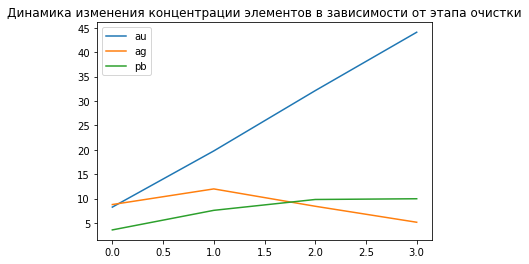

In [29]:
concentrate_tmp = pd.DataFrame({'au': [concentrate['rougher.input.feed_au'].mean(),
                                       concentrate['rougher.output.concentrate_au'].mean(), 
                                      concentrate['primary_cleaner.output.concentrate_au'].mean(),
                                      concentrate['final.output.concentrate_au'].mean()],
                              'ag': [concentrate['rougher.input.feed_ag'].mean(),
                                     concentrate['rougher.output.concentrate_ag'].mean(), 
                                      concentrate['primary_cleaner.output.concentrate_ag'].mean(),
                                      concentrate['final.output.concentrate_ag'].mean()],
                              'pb': [concentrate['rougher.input.feed_pb'].mean(), 
                                     concentrate['rougher.output.concentrate_pb'].mean(), 
                                      concentrate['primary_cleaner.output.concentrate_pb'].mean(),
                                      concentrate['final.output.concentrate_pb'].mean()]})
concentrate_tmp.plot(title = 'Динамика изменения концентрации элементов в зависимости от этапа очистки');

Концентрация золота от этапа к этапу растет и его начальная концентрация довольно высокая.

Концентрация серебра с начального уровня золота уменьшается от этапа к этапу.

Концентрация свинца увеличивается от сырья до первого этапа, и немного ко второму этапу, а к третьему практически не меняется.

Проанализируем распределение гранул на обучающей и тестовой выборке. 

In [30]:
feed_size_train = gold_recovery_train[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']]
feed_size_train.describe().T

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_size,14149.0,60.239856,23.005310,9.659576,48.966751,55.269784,66.007526,484.967466
primary_cleaner.input.feed_size,14149.0,7.322310,0.614062,1.080000,6.960000,7.290000,7.700000,10.470000


In [31]:
feed_size_test = gold_recovery_test[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']]
feed_size_test.describe().T

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_size,5290.0,55.952754,19.080334,0.046369,43.906504,50.846843,62.451165,392.49404
primary_cleaner.input.feed_size,5290.0,7.266339,0.610219,5.650000,6.890000,7.250000,7.600000,15.50000


Разброс значений размера гранул для этапа флотации широкий: от 9,6 до 485 на обучающей вырборке и от 0 до 392 на тестовой выборке. Средние значения отличаются.

Разброс значений размера гранул для этапа первичной очистки намного уже и значения почти не отличаются в обучающей и тестовой выборке: от 0,6 до 10/15.

Посмторим распределение значений на графике.

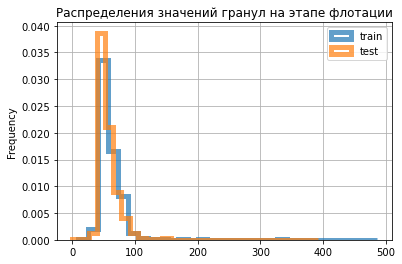

In [32]:
ax = feed_size_train.plot(kind='hist', y='rougher.input.feed_size', histtype='step', density=True, bins=30, linewidth=5, alpha=0.7, label='train')
feed_size_test.plot(kind='hist', y='rougher.input.feed_size', histtype='step', density=True, bins=30, linewidth=5, alpha=0.7, label='test', ax=ax, grid=True, legend=True, title='Распределения значений гранул на этапе флотации');

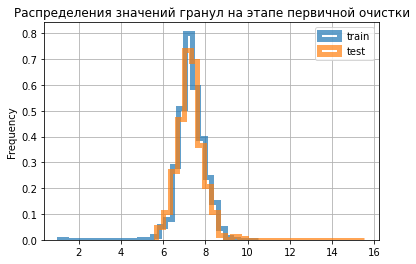

In [33]:
ax = feed_size_train.plot(kind='hist', y='primary_cleaner.input.feed_size', histtype='step', density=True, bins=30, linewidth=5, alpha=0.7, label='train')
feed_size_test.plot(kind='hist', y='primary_cleaner.input.feed_size', histtype='step', density=True, bins=30, linewidth=5, alpha=0.7, label='test', ax=ax, grid=True, legend=True, title='Распределения значений гранул на этапе первичной очистки');

Распределения в обучающей и тестовой выборке похожи, корректировки данных не требуется.

Исследуем суммарные концентрации на каждом этапе. Также используем полный набор данных, т.к. эти признаки есть только в нем.

Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
Заметили аномальные значения в суммарном распределении или нет?
Если они есть, стоит ли их удалять из обеих выборок?
Опишите выводы и удалите аномалии.

In [34]:
gold_recovery_full['rougher.input.feed'] = gold_recovery_full['rougher.input.feed_ag'] + \
                                                  gold_recovery_full['rougher.input.feed_au'] + \
                                                gold_recovery_full['rougher.input.feed_pb'] + \
                                                gold_recovery_full['rougher.input.feed_sol']
gold_recovery_full['rougher.output.concentrate'] = gold_recovery_full['rougher.output.concentrate_ag'] + \
                                                  gold_recovery_full['rougher.output.concentrate_au'] + \
                                                gold_recovery_full['rougher.output.concentrate_pb'] + \
                                                gold_recovery_full['rougher.output.concentrate_sol']
gold_recovery_full['primary_cleaner.output.concentrate'] = gold_recovery_full['primary_cleaner.output.concentrate_ag'] + \
                                                gold_recovery_full['primary_cleaner.output.concentrate_au'] + \
                                                gold_recovery_full['primary_cleaner.output.concentrate_pb'] + \
                                                gold_recovery_full['primary_cleaner.output.concentrate_sol']
gold_recovery_full['final.output.concentrate'] = gold_recovery_full['final.output.concentrate_ag'] + \
                                                gold_recovery_full['final.output.concentrate_au'] + \
                                                gold_recovery_full['final.output.concentrate_pb'] + \
                                                gold_recovery_full['final.output.concentrate_sol']
gold_recovery_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,72.640924,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,72.543485,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,72.095042,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,59.957723,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,71.321010,64.004667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,53.415050,70.781325,59.001692,68.098589
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,53.696482,70.539603,59.703912,68.274362
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,54.589604,55.376330,59.561096,68.226068
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,54.027355,69.201689,57.216686,68.200449


In [35]:
gold_recovery_full[['rougher.input.feed', 'rougher.output.concentrate', 
                                 'primary_cleaner.output.concentrate', 'final.output.concentrate']].describe().T

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed,19245.0,57.407926,7.165219,0.04,53.660745,57.647093,62.012223,76.978947
rougher.output.concentrate,19416.0,68.188914,12.478522,0.00,66.026048,70.186130,74.362878,88.140119
primary_cleaner.output.concentrate,19069.0,60.949928,9.953770,0.00,59.165854,62.615189,65.725507,80.749343
final.output.concentrate,19227.0,68.727562,7.423741,0.00,67.985659,69.632597,71.390461,80.210644


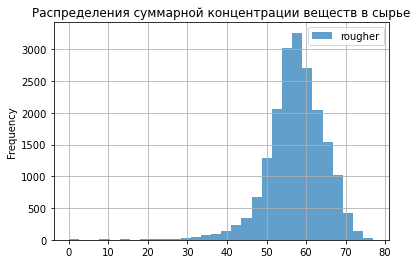

In [36]:
gold_recovery_full.plot(kind='hist', y='rougher.input.feed', bins=30, linewidth=5, alpha=0.7, label='rougher', grid=True, legend=True, title='Распределения суммарной концентрации веществ в сырье');

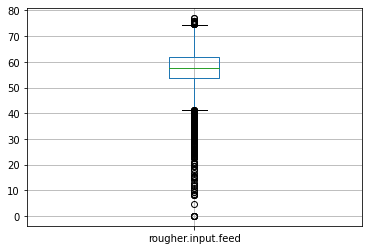

In [37]:
gold_recovery_full.boxplot(column='rougher.input.feed');

По гистриграмме явных выбросов нет. По показателям статистического распределения предлагается удалить знаения меньше 40 и больше 75.

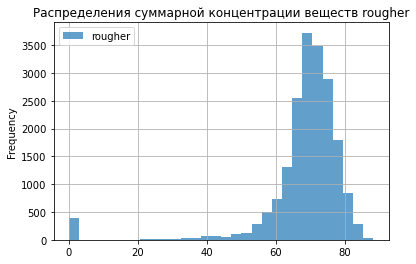

In [38]:
gold_recovery_full.plot(kind='hist', y='rougher.output.concentrate', bins=30, linewidth=5, alpha=0.7, label='rougher', grid=True, legend=True, title='Распределения суммарной концентрации веществ rougher');

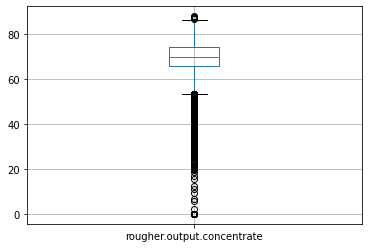

In [39]:
gold_recovery_full.boxplot(column='rougher.output.concentrate');

Для этапа флотации по гистограмме наблюдаются аномальные выбросы у значения 0. Судя по boxplot все значения меньше 50 и выше 90 следует удалить, т.к. они являются аномальными.

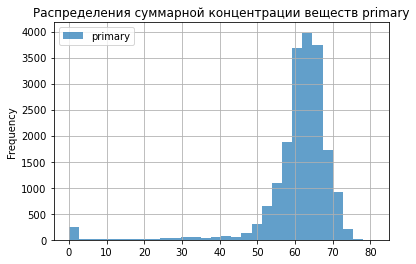

In [40]:
gold_recovery_full.plot(kind='hist', y='primary_cleaner.output.concentrate', bins=30, linewidth=5, alpha=0.7, label='primary', grid=True, legend=True, title='Распределения суммарной концентрации веществ primary');

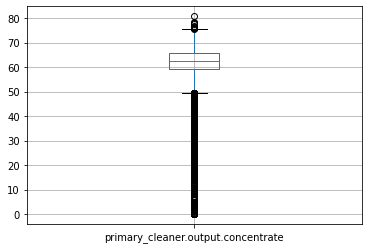

In [41]:
gold_recovery_full.boxplot(column='primary_cleaner.output.concentrate');

Для этапа первичной очистки по гистограмме наблюдаются аномальные выбросы у значения 0. Судя по boxplot все значения меньше 50 и выше 75 следует удалить, т.к. они являются аномальными.

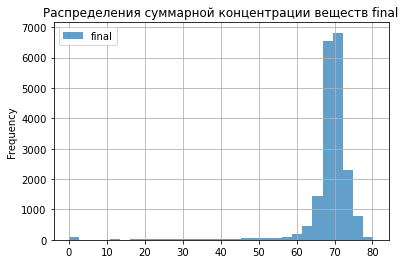

In [42]:
gold_recovery_full.plot(kind='hist', y='final.output.concentrate', bins=30, linewidth=5, alpha=0.7, label='final', grid=True, legend=True, title='Распределения суммарной концентрации веществ final');

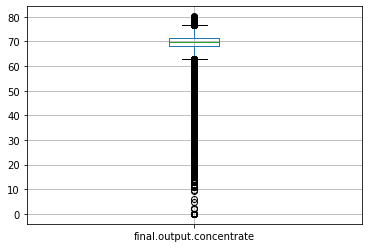

In [43]:
gold_recovery_full.boxplot(column='final.output.concentrate');

Для этапа финальной очистки по гистограмме наблюдаются небольшие выбросы у нулевых значений. Судя по boxplot все значения меньше 63 и выше 75 следует удалить, т.к. они являются аномальными.

Несмотря на данные boxplot удалим те строки, значения которых близки к нулю или нулевые. В реальных данных могут наблюдаться и околонулевые значения, но маловероятно, что будут нули. Удалим нулевые данные из обучающего набора и посмотрим на качество модели. Тестовый набор не корректируем, поскольку это снижает его репрезентативность.

In [44]:
# выводим размер выборки до удаления записей
print('Размер полной выборки до удаления некорректных записей', gold_recovery_full.shape)

# удаляем некорректные записи из полного набора
gold_recovery_full = gold_recovery_full[gold_recovery_full['rougher.input.feed'] > 0.5]
gold_recovery_full = gold_recovery_full[gold_recovery_full['rougher.output.concentrate'] > 0.5]
gold_recovery_full = gold_recovery_full[gold_recovery_full['primary_cleaner.output.concentrate'] > 0.5]
gold_recovery_full = gold_recovery_full[gold_recovery_full['final.output.concentrate'] > 0.5]

# проверяем, что количество записей уменьшилось
print('Размер полной выборки после удаления некорректных записей', gold_recovery_full.shape)

# выводим размер выборок до удаления записей
print('Размер обучающей выборки до удаления некорректных записей', gold_recovery_train.shape)

# удаляем некорректные записи из обучающей и тестовой выборок
gold_recovery_full_target = gold_recovery_full[['date']]
gold_recovery_train = gold_recovery_train.merge(gold_recovery_full_target, on='date')

# проверяем, что количество записей уменьшилось
print('Размер обучающей выборки после удаления некорректных записей', gold_recovery_train.shape)

Размер полной выборки до удаления некорректных записей (19439, 91)
Размер полной выборки после удаления некорректных записей (18083, 91)
Размер обучающей выборки до удаления некорректных записей (14149, 55)
Размер обучающей выборки после удаления некорректных записей (13043, 55)


**Выводы**

Были исследованы концентрации металлов на каждом этапе и сопоставлены распределения концентраций в обучащей и тестовой выборке.

Концентрация золота от этапа к этапу растет и его начальная концентрация довольно высокая.
Концентрация серебра уменьшается от этапа к этапу, несмотря на то, что в сырье концентрация серебра и золота одинакова.
Концентрация свинца увеличивается на первом этапе в 2 раза, затем немного растет от первого ко второму этапу, а к третьему практически не меняется.

Распределений концентраций в обучающей и тестовой выборке похожи.

Также были исследованы суммарные концентрации веществ и удалены нулевые значения из обучающей выборки.

## Модель

Разделим обучающую и тестовую выборку на feature и target.

In [45]:
features_train = gold_recovery_train.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
target_train_rougher = gold_recovery_train['final.output.recovery'] 
target_train_final = gold_recovery_train['rougher.output.recovery'] 

features_test = gold_recovery_test.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
target_test_rougher = gold_recovery_test['final.output.recovery'] 
target_test_final = gold_recovery_test['rougher.output.recovery'] 

Напишем функцию для вычиcления итоговой sMAPE.

In [46]:
def smape_scorer(target, predictions):
        return 100/len(target) * np.sum(2 * np.abs(target - predictions) / (np.abs(target) + np.abs(predictions)))

def result_smape(smape_rougher, smape_final):
    koef_rougher = 0.25
    koef_final = 0.75
    return (koef_rougher * smape_rougher + koef_final * smape_final)

Исследуем несколько моделей:
* Линейная регрессия
* Случайный лес

1. Линейная регрессия.

In [54]:
scorer = make_scorer(smape_scorer, greater_is_better = False)

model_r = LinearRegression()

scores_r = cross_val_score(model_r, features_train, target_train_rougher, cv=5, scoring=scorer)
scores_r_mean = pd.Series(scores_r).mean()

model_f = LinearRegression()

scores_f = cross_val_score(model_f, features_train, target_train_final, cv=5, scoring=scorer)
scores_f_mean = pd.Series(scores_f).mean()

res_smape_lr = result_smape(scores_r_mean, scores_f_mean)

print('Значение smape для модели линейной регрессии, этап флотации:', scores_r_mean)
print('Значение smape для модели линейной регрессии, финальный этап:', scores_f_mean)
print('Значение smape для модели линейной регрессии:', res_smape_lr)

Значение smape для модели линейной регрессии, этап флотации: -10.086040110471455
Значение smape для модели линейной регрессии, финальный этап: -6.963159906284732
Значение smape для модели линейной регрессии: -7.743879957331413


2. Случайный лес. Для подбора параметров случайного леса используем RandomizedSearchCV.

In [67]:
%%time

scorer_cv = make_scorer(smape_scorer, greater_is_better = False)

model_rf = RandomForestRegressor(random_state=12345)  
 
parametrs_rf = {
    'n_estimators': [100, 200, 300],  
    'min_samples_leaf': [1, 3 ,5],  
    'max_depth': [1, 2]  
}  
model_rcv_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=parametrs_rf, n_jobs=-1, random_state=42, scoring=scorer_cv)  
model_rcv_rf.fit(features_train, target_train_rougher)

model_rcv_rf.best_params_

CPU times: total: 18 s
Wall time: 4min 12s


{'n_estimators': 200, 'min_samples_leaf': 3, 'max_depth': 2}

In [69]:
%%time

model_rf_f = RandomForestRegressor(random_state=12345)  
 
parametrs_rf_f = {
    'n_estimators': [100, 200, 300],  
    'min_samples_leaf': [1, 3, 5],  
    'max_depth': [1, 2]  
}  
model_rcv_rf_f = RandomizedSearchCV(estimator=model_rf, param_distributions=parametrs_rf_f, n_jobs=-1, random_state=42, scoring=scorer_cv)  
model_rcv_rf_f.fit(features_train, target_train_final)

model_rcv_rf_f.best_params_

CPU times: total: 9.56 s
Wall time: 4min 25s


{'n_estimators': 100, 'min_samples_leaf': 5, 'max_depth': 2}

In [70]:
print(f'Значение smape для модели случайного леса, этап флотации: {model_rcv_rf.best_score_}')
print(f'Значение smape для модели случайного леса, финальный этап: {model_rcv_rf_f.best_score_}')
res_smape_rf = result_smape(model_rcv_rf.best_score_, model_rcv_rf_f.best_score_)
print(f'Значение smape для модели случайного леса: {res_smape_rf}')

Значение smape для модели случайного леса, этап флотации: -8.615612234821636
Значение smape для модели случайного леса, финальный этап: -7.0010419460726
Значение smape для модели случайного леса: -7.404684518259859


Лучший результат по итоговому sMAPE дала линейная регрессия (-7.74). При этом по этапу флотации показатель значительно лучше (-10.08), чем у модели случайного леса (-8.61), а по финальному этапу очистки значение чуть лучше в модели случайного леса (-7 против -6.96). Скомбинируем модели и проверим на тестовой выборке результаты.

In [62]:
# флотация линейная регрессия
model_r.fit(features_train, target_train_rougher)
predicted_test_r = model_r.predict(features_test)
smape_lr_r = smape_scorer(target_test_rougher, predicted_test_r)

# финальный этап линейная регрессия
model_f.fit(features_train, target_train_final) 
predicted_test_f = model_f.predict(features_test)
smape_lr_f = smape_scorer(target_test_final, predicted_test_f)

# финальный этап случаный лес
smape_rf_f = smape_scorer(target_test_final, model_rcv_rf_f.best_estimator_.predict(features_test))

res_smape_lr_test = result_smape(smape_lr_r, smape_lr_f)
res_smape_comb_test = result_smape(smape_lr_r, smape_rf_f)

print('Значение smape для модели линейной регрессии, этап флотации:', smape_lr_r)
print('')
print('Значение smape для модели линейной регрессии, финальный этап:', smape_lr_f)
print('Значение smape для модели случайного леса, финальный этап:', smape_rf_f)
print('')
print('Значение smape для модели линейной регрессии:', res_smape_lr_test)
print('Значение smape для смешанной модели:', res_smape_comb_test)

Значение smape для модели линейной регрессии, этап флотации: 9.395806526904247

Значение smape для модели линейной регрессии, финальный этап: 8.708068226163281
Значение smape для модели случайного леса, финальный этап: 8.23885245256732

Значение smape для модели линейной регрессии: 8.880002801348523
Значение smape для смешанной модели: 8.528090971151551


Ипользование линейной регрессии все-таки более оправдано.

Проверим, что DummyRegressor не дает лучшего результата, чем рассмотренные модели.

In [126]:
rough_baseline = DummyRegressor(strategy='mean').fit(features_train, target_train_rougher)
rough_baseline_predicted = rough_baseline.predict(features_test)
dummy_test_rough_score = smape_scorer(target_test_rougher, rough_baseline_predicted)
 
final_baseline = DummyRegressor(strategy='mean').fit(features_train, target_train_final)
final_baseline_predicted = final_baseline.predict(features_test)
dummy_test_final_score = smape_scorer(target_test_final, final_baseline_predicted)
 
dummy_score = result_smape(dummy_test_rough_score, dummy_test_final_score)

print('Значение smape для dummy модели, этап флотации:', dummy_test_rough_score)
print('Значение smape для dummy модели, финальный этап:', dummy_test_final_score)
print('Значение smape для dummy модели:', dummy_score)

Значение smape для dummy модели, этап флотации: 8.012090483850557
Значение smape для dummy модели, финальный этап: 4.990925837080806
Значение smape для dummy модели: 5.746216998773244


Константная модель дает значительно лучший результат.

**Выводы**

Лучший результат дала модель случайного леса, хоть и линейная регрессия незначительно хуже, а работает быстрее. Показатели и той, и другой модели лучше sMAPE константной модели.

# Общий вывод

Необходимо было подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Были использованы данные с параметрами добычи и очистки. 

Модель должна помочь оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

В ходе исследования были выполнены следующие работы:

*1. Подготовлены данные*

1.1. В тестовые данные добавлены целевые признаки из полного набора.

1.2. Из обучающего набора удалены ненужные признаки, в частности из этапа output. Эти данные которые могут влиять на качество модели (даталики).

1.3. Заполнены пропуски.

*2. Проведен исследовательский анализ данных*

Были исследованы концентрации металлов на каждом этапе и сопоставлены распределения концентраций в обучащей и тестовой выборке.

Концентрация золота от этапа к этапу растет и его начальная концентрация довольно высокая. Концентрация серебра уменьшается от этапа к этапу, несмотря на то, что в сырье концентрация серебра и золота одинакова. Концентрация свинца увеличивается на первом этапе в 2 раза, затем немного растет от первого ко второму этапу, а к третьему практически не меняется.

Распределений концентраций в обучающей и тестовой выборке похожи.

Также были исследованы суммарные концентрации веществ и удалены нулевые значения из выборок.

*3. Построено и обучено несколько моделей и выбрана лучшая.*

Лучший результат показала линейная регрессия, но на тестовых данных сравннение с константной моделью показало, что эта модель не релевантна.
